# Creating a Knowledge Graph of the COVID-19 literature

The dataset can be downloaded [here](https://www.kaggle.com/group16/covid19-literature-knowledge-graph).

## What is a Knowledge Graph?

This dataset provides us with a large collection of papers that deal with the COVID-19 virus. For each paper, different information is provided such as the journal in which it was published, the content of the paper and information about the authors. Additionally, each paper has a number of references to other works. In order to deal with these links between papers, a graph representation is needed. A knowledge graph is a specific type of graph: it is a directed graph with labeled edges. Knowledge graphs allow to unify heteregenous sources of information into a single, standardized format. 

A knowledge graph of the COVID literature could look something like:
<div style="text-align:center"><img src="https://i.imgur.com/MJ7VeUM.png" style="width: 50%"/></div>

## Mapping to RDF data with [RML.io](https://rml.io/)
<div style="text-align:center">
    <img src="https://i.imgur.com/bsA1VWM.png" style="width: 10%; display: inline-block;"/> 
    <img src="https://i.imgur.com/mz95P06.png" style="width: 10%; display: inline-block;"/>
    <img src="https://i.imgur.com/InjNtFe.png" style="width: 10%; display: inline-block;"/>
</div>
In order to convert the provided CSV & JSON files to RDF data (the standard for Knowledge Graph representation), we will make use of [RML.io](https://rml.io/). RML allows to easily define a mapping from different data formats to RDF data. For an interactive example of how it works, check out [this resource](https://rml.io/yarrrml/matey/).

# Working with RDF data in Python

To work with RDF data in Python, [rdflib](https://github.com/RDFLib/rdflib) can be used.

In [1]:
!pip install rdflib
!apt-get -y install python-dev graphviz libgraphviz-dev pkg-config
!pip install pygraphviz

     |████████████████████████████████| 344 kB 2.8 MB/s 
     |████████████████████████████████| 45 kB 2.0 MB/s 



graphviz is already the newest version (2.38.0-17).
pkg-config is already the newest version (0.29-4+b1).
pkg-config set to manually installed.
python-dev is already the newest version (2.7.13-2).
python-dev set to manually installed.
The following additional packages will be installed:
  autotools-dev libgvc6-plugins-gtk libltdl-dev libtool
Suggested packages:
  libtool-doc autoconf automaken gcj-jdk
The following NEW packages will be installed:
  autotools-dev libgraphviz-dev libgvc6-plugins-gtk libltdl-dev libtool
0 upgraded, 5 newly installed, 0 to remove and 34 not upgraded.
Need to get 938 kB of archives.
After this operation, 2726 kB of additional disk space will be used.
Get:1 http://deb.debian.org/debian stretch/main amd64 autotools-dev all 20161112.1 [73.4 kB]
Get:2 http://deb.debian.org/debian stretch/main amd64 libgvc6-plugins-gtk amd64 2.38.0-17 [59.7 kB]
Get

In [2]:
import rdflib
import networkx as nx
%matplotlib inline
import matplotlib.pyplot as plt

# Load the data

In [3]:
# This takes a while...
g = rdflib.Graph()
g.parse('/notebooks/input/covid19-literature-knowledge-graph/kg.nt', format='nt')

<Graph identifier=N152ae6bf591542efbec497dec439594a (<class 'rdflib.graph.Graph'>)>

In [ ]:
# Dump the graph in Turtle format
g.serialize(destination='/notebooks/input/kg.ttl', format='turtle')

# Get some basic statistics

In [4]:
# Number of triples
print(len(list(g.triples((None, None, None)))))

#Ppredicates
print(set(g.predicates()))

# Number of subjects
print(len(set(g.subjects())))

4971028
{rdflib.term.URIRef('http://dbpedia.org/property/tagline'), rdflib.term.URIRef('http://dbpedia.org/property/inaccurate'), rdflib.term.URIRef('http://dbpedia.org/property/thirdViceChancellor'), rdflib.term.URIRef('http://dbpedia.org/property/div'), rdflib.term.URIRef('http://dbpedia.org/property/long'), rdflib.term.URIRef('http://dbpedia.org/property/rector'), rdflib.term.URIRef('http://dbpedia.org/property/sepSnowDays'), rdflib.term.URIRef('http://dbpedia.org/property/areaLowestPoint'), rdflib.term.URIRef('http://dbpedia.org/property/theAfr'), rdflib.term.URIRef('http://dbpedia.org/property/octSun'), rdflib.term.URIRef('http://dbpedia.org/property/otherLanguages'), rdflib.term.URIRef('http://dbpedia.org/property/6p'), rdflib.term.URIRef('http://dbpedia.org/property/revhep'), rdflib.term.URIRef('http://dbpedia.org/property/febHighC'), rdflib.term.URIRef('http://dbpedia.org/property/mps'), rdflib.term.URIRef('http://dbpedia.org/property/type'), rdflib.term.URIRef('http://dbpedia.

# Iterate over triples of a paper

In [5]:
rand_paper = rdflib.URIRef('http://dx.doi.org/10.3390%2Fjcm9020388')
for i, (s, p, o) in enumerate(g.triples((rand_paper, None, None))):
    print(s, p, o)
    if i >= 25:
        break

http://dx.doi.org/10.3390%2Fjcm9020388 http://idlab.github.io/covid19#hasWords outbreak
http://dx.doi.org/10.3390%2Fjcm9020388 http://idlab.github.io/covid19#hasWords information
http://dx.doi.org/10.3390%2Fjcm9020388 http://idlab.github.io/covid19#wordsInBody process
http://dx.doi.org/10.3390%2Fjcm9020388 http://idlab.github.io/covid19#wordsInBody infected
http://dx.doi.org/10.3390%2Fjcm9020388 http://idlab.github.io/covid19#wordsInBody data
http://dx.doi.org/10.3390%2Fjcm9020388 http://idlab.github.io/covid19#wordsInBody syndrome
http://dx.doi.org/10.3390%2Fjcm9020388 http://idlab.github.io/covid19#wordsInBody rate
http://dx.doi.org/10.3390%2Fjcm9020388 http://idlab.github.io/covid19#hasWords limited
http://dx.doi.org/10.3390%2Fjcm9020388 http://idlab.github.io/covid19#wordsInBody confirmed
http://dx.doi.org/10.3390%2Fjcm9020388 http://idlab.github.io/covid19#wordsInBody report
http://dx.doi.org/10.3390%2Fjcm9020388 http://idlab.github.io/covid19#wordsInBody including
http://dx.doi.o

# Visualise part of the KG

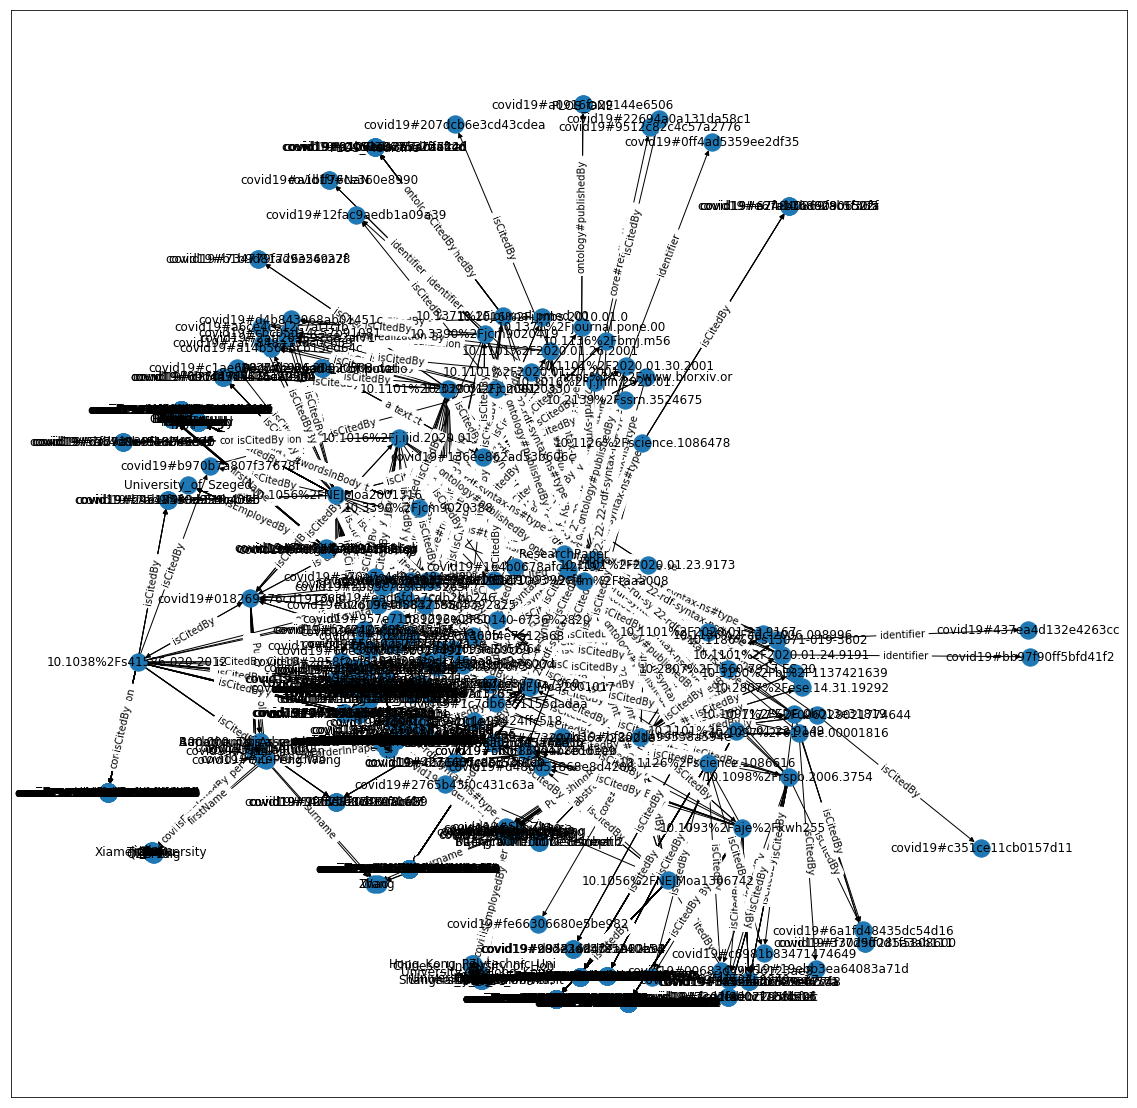

In [6]:
def create_sub_graph(root, depth):
    # Limit number of hasWords relations to not overcrowd the figure
    words_cntr = 0
    
    # Get all the triples that are maximally 2 hops away from our randomly picked paper
    objects = set()
    nx_graph = nx.DiGraph()
    
    to_explore = {root}
    for _ in range(depth):
        new_explore = set()
        for node in to_explore:
            for s, p, o in g.triples((node, None, None)):
                if 'words' in str(p).lower():
                    if words_cntr >= 25:
                        continue
                    words_cntr += 1

                s_name = str(s).split('/')[-1][:25]
                p_name = str(p).split('/')[-1][:25]
                o_name = str(o).split('/')[-1][:25]
                nx_graph.add_node(s_name, name=s_name)
                nx_graph.add_node(o_name, name=o_name)
                nx_graph.add_edge(s_name, o_name, name=p_name)
                
                new_explore.add(o)
        to_explore = new_explore
    return nx_graph
    
nx_graph = create_sub_graph(rand_paper, 3)
        
plt.figure(figsize=(20, 20))
_pos = nx.kamada_kawai_layout(nx_graph)
_ = nx.draw_networkx_nodes(nx_graph, pos=_pos)
_ = nx.draw_networkx_edges(nx_graph, pos=_pos)
_ = nx.draw_networkx_labels(nx_graph, pos=_pos, fontsize=8)
names = nx.get_edge_attributes(nx_graph, 'name')
_ = nx.draw_networkx_edge_labels(nx_graph, pos=_pos, edge_labels=names, fontsize=8)

**We can distinguish some information about the content of the paper in the top of the figure. Some citation information on the left and author information in the bottom**